<h1 align='center'>My Assignment</h1>

### Aim: To classify bricks as a defective or not defective in a given video.

#### To perform this particular task first I have captured the frames from the video to generate the data for training the model.
#### After capturing all the frames I got 3000 frames/images from this video.
#### After this i only kept the images of bricks. So there are total 38 bricks images present in the data.
#### Screenshot of the code for capturing the frames is given below. (I made another notebook for this so I paste the screenshot here)

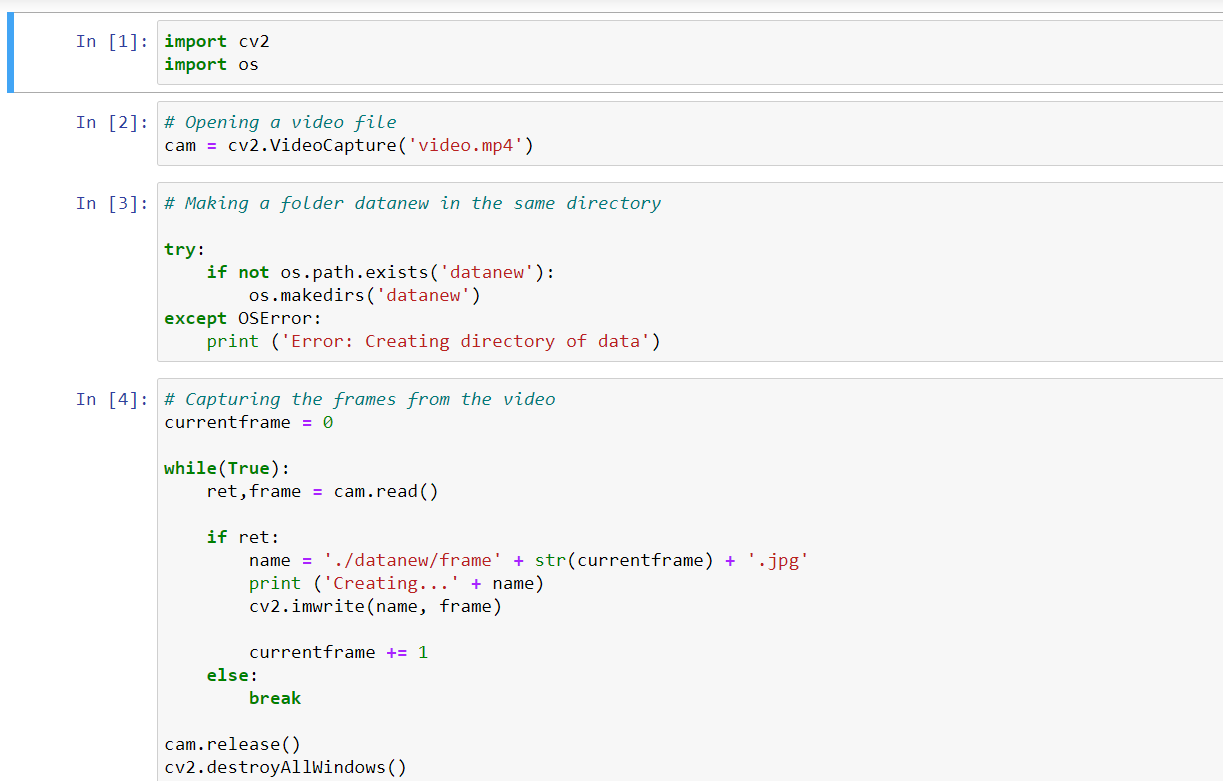

## Creating Model for classification

In [1]:
# Importing all the necessary libraries.
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

In [4]:
# Reading one image to check whether the defined path is correct or not.
img = plt.imread('original_data/train/defective/frame1044.jpg')

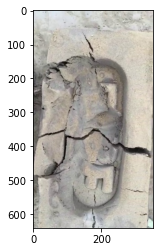

In [5]:
plt.imshow(img)

In [6]:
# As we seen all the images having a shape of 3 params(height, width, channels)
img.shape

(640, 352, 3)

In [7]:
img

array([[[212, 217, 220],
        [212, 217, 220],
        [212, 217, 220],
        ...,
        [219, 214, 211],
        [217, 212, 209],
        [217, 212, 209]],

       [[215, 220, 223],
        [215, 220, 223],
        [214, 219, 222],
        ...,
        [218, 213, 210],
        [218, 213, 210],
        [218, 213, 210]],

       [[217, 222, 225],
        [217, 222, 225],
        [216, 221, 224],
        ...,
        [218, 213, 210],
        [219, 214, 211],
        [218, 213, 210]],

       ...,

       [[172, 171, 166],
        [140, 139, 134],
        [119, 118, 113],
        ...,
        [217, 238, 231],
        [216, 237, 230],
        [216, 237, 230]],

       [[181, 182, 176],
        [175, 176, 170],
        [174, 175, 169],
        ...,
        [215, 234, 228],
        [214, 235, 228],
        [213, 234, 227]],

       [[184, 185, 179],
        [187, 188, 182],
        [188, 189, 184],
        ...,
        [206, 225, 219],
        [208, 227, 221],
        [206, 227, 220]]

In [8]:
img.min(),img.max()

(0, 255)

In [9]:
# Rescaling down the images present in the training and validation folder.
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [10]:
# Generating a class labels for training the model to classify based on classes.
train_dataset = train.flow_from_directory('original_data/train/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

validation_dataset = validation.flow_from_directory('original_data/validation/',
                                         target_size = (200,200),
                                         batch_size = 3,
                                         class_mode = 'binary')

Found 38 images belonging to 2 classes.
Found 15 images belonging to 2 classes.


In [11]:
# Created two classes as defective:0 and not defective:1
train_dataset.class_indices

{'defective': 0, 'not defective': 1}

In [12]:
train_dataset.classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [13]:
# Creating a CNN model to classify the images.
# Adding an input layers with a activation functn as relu and providing a filter size to detect the features from the images.
# Classification done with the help of activation function as sigmoid as it has a binary classes. For multiclass classification we can use SOftmax.
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3),activation='relu',input_shape = (200,200,3)),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(32,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
                                    tf.keras.layers.MaxPool2D(2,2),
                                    
                                    tf.keras.layers.Flatten(),
                                    
                                    tf.keras.layers.Dense(512,activation='relu'),
                                    
                                    tf.keras.layers.Dense(1,activation='sigmoid')
                                    
                                    ])

In [14]:
# Compilation of the model takes place having a loss function as binary crossentropy,
# Optimizer as RMSprop having a learning rate  of 0.001
# For calculating the accuracy i have used accuracy metrics.
model.compile(loss='binary_crossentropy',
             optimizer=RMSprop(lr=0.001),
             metrics=['accuracy'])

In [16]:
# Fitting the model on a training dataset.
model_fit = model.fit(train_dataset,steps_per_epoch=3,epochs=20,validation_data=validation_dataset)

Epoch 1/20
3/3 [==============================] - 1s 477ms/step - loss: 1.0370 - accuracy: 0.7500 - val_loss: 0.6715 - val_accuracy: 0.4667
Epoch 2/20
3/3 [==============================] - 1s 412ms/step - loss: 0.6815 - accuracy: 0.6667 - val_loss: 0.5716 - val_accuracy: 0.4667
Epoch 3/20
3/3 [==============================] - 1s 468ms/step - loss: 0.7959 - accuracy: 0.7778 - val_loss: 0.5124 - val_accuracy: 0.6667
Epoch 4/20
3/3 [==============================] - 1s 421ms/step - loss: 0.5119 - accuracy: 0.8889 - val_loss: 0.5357 - val_accuracy: 0.6667
Epoch 5/20
3/3 [==============================] - 1s 403ms/step - loss: 0.3355 - accuracy: 0.8750 - val_loss: 0.5116 - val_accuracy: 0.6667
Epoch 6/20
3/3 [==============================] - 1s 402ms/step - loss: 0.5252 - accuracy: 0.7500 - val_loss: 0.2988 - val_accuracy: 0.9333
Epoch 7/20
3/3 [==============================] - 1s 382ms/step - loss: 0.1272 - accuracy: 1.0000 - val_loss: 0.4812 - val_accuracy: 0.8000
Epoch 8/20
3/3 [====

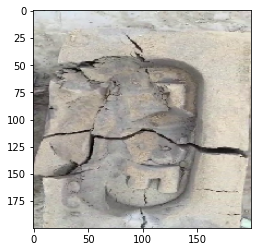

Defective


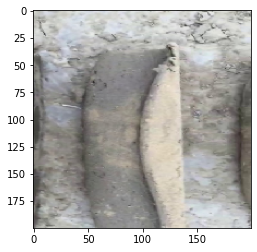

Not defective


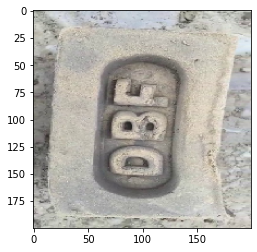

Not defective


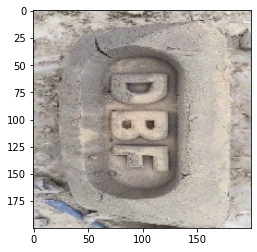

Not defective


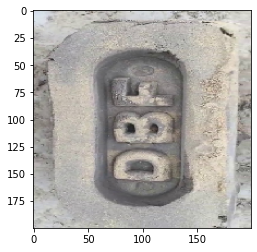

Not defective


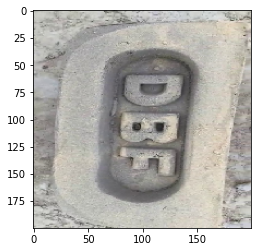

Not defective


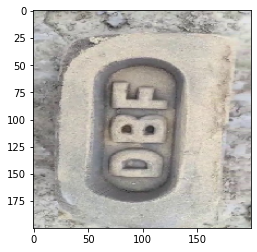

Not defective


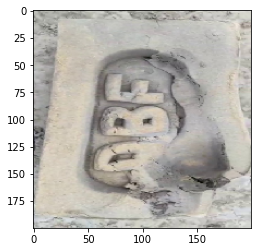

Defective


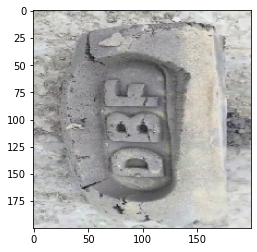

Defective


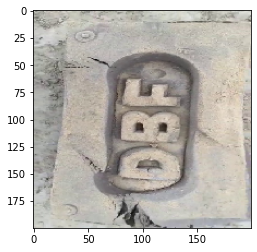

Defective


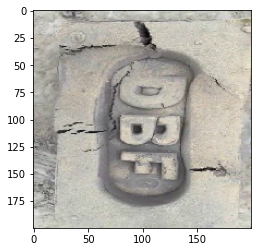

Defective


In [17]:
# Adding the path for testing images
dir_path = 'original_data/testing imgs/'

for i in os.listdir(dir_path):
    img = image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    images = np.vstack([X])
    # Classify testing images as defective or not defective.
    val = model.predict(images)
    
    if val==0:
        print('Defective')
    else:
        print('Not defective')

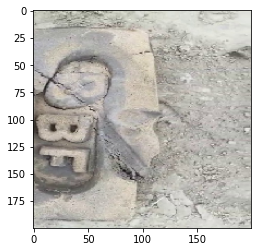

In [23]:
img = image.load_img('frame42.jpg',target_size=(200,200))
plt.imshow(img)    

In [24]:
X = image.img_to_array(img)
X = np.expand_dims(X,axis=0)

In [33]:
def prediction(X):
    val = model.predict(X)
    if val==0:
        print('Defective')
    else:
        print('Not defective')

In [34]:
prediction(X)

Not defective


## Conclusion:
#### As CNN works well with image data so after applying CNN I achieved the accuracy of 100% (As there are less no of images).
#### All the Hyperparameters are I have used based of heat and trial method. We can also tune the hyperparameters with the help of hyperparameter tuning methods like Keras Tunner.

# Thanks!